In [2]:
import sys
from pathlib import Path
import os 
ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

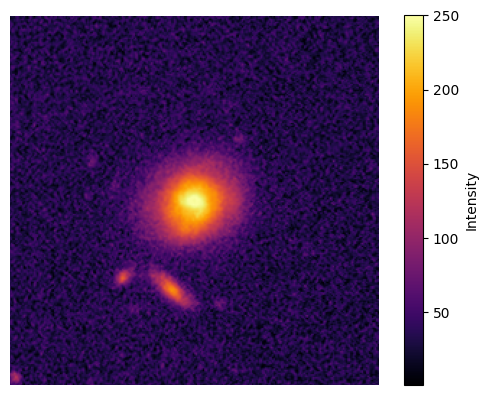

In [7]:
# Convert a specific image to FITS format and show it
# from src.preprocess.image_preprocessor import ImagePreprocessor
from src.utils.plot import plot_fits

# image = 'eso0949a'
# data = ROOT / f"data/raw/eso_images/{image}.jpg"

# output_folder = ROOT / f"data/processed/{image}"

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# size = 256
# preprocessor = ImagePreprocessor(image_path=data, width=size, height=size)
# preprocessor.convert_to_fits(output_folder=ROOT / f"data/processed/{image}/groundtruth")
image = 'img_0000'

fits_file = ROOT / f"data/processed/{image}/groundtruth.fits"
plot_fits(fits_file)

2025-06-27 02:53:42	WARN	simobserve::simutil::casa	Sky model cell of 0.02 asec is large compared to highest resolution 0.025815268316070682 asec. (Did you set incell?)
2025-06-27 02:53:44	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out28.noisy.T.cal_sim_temp (Tf Jones):
2025-06-27 02:53:44	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-06-27 02:53:44	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.


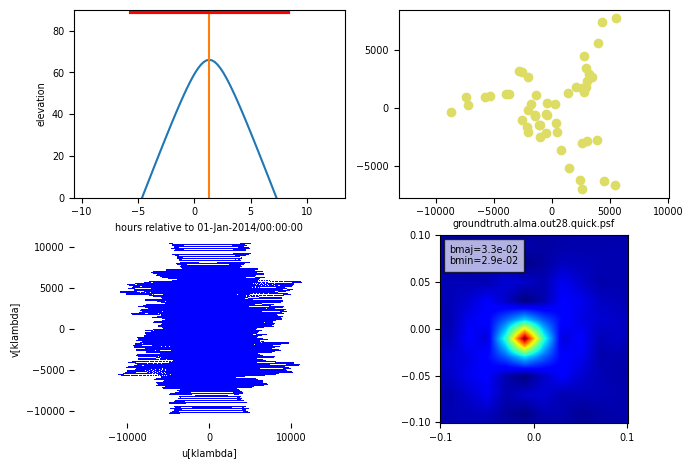

In [9]:
# Simulate a specific image
from src.preprocess.simulator import Simulator

antenna = 'alma.out28'

sim_number = 1

simoberve_config = {
    'antenna' : f'{antenna}.cfg',
    'totaltime' : 50000, # in seconds
    'noise': 0,  # in Jy
    'arcsec': 0.02,  # in arcseconds
}

image_path = ROOT / f"data/processed/{image}/groundtruth.fits"
simulator = Simulator(
    image = image_path,
    simobserve_config=simoberve_config,
    output_folder = ROOT / f"data/processed/{image}/sim{sim_number}",
    output_name = f"visibilities",
)

simulator.simulate()

2025-06-27 02:53:46	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


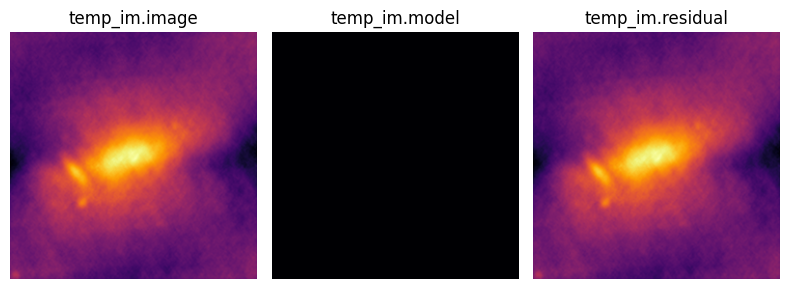

In [10]:
from src.utils.plot import plot_ms

ms_file = ROOT / f"data/processed/{image}/sim{sim_number}/visibilities.ms"
plot_ms(ms_file)